# Feature Engineering - Rare Labels

### Labels that occur rarely
Categorical variables are those whose values are selected from a group of categories, also called labels. Different labels appear in the dataset with different frequencies. Some categories appear more frequently in the dataset, whereas some other categories appear only in a few number of observations.

For example, in a dataset with information about loan applicants where one of the variables is “city” in which the applicant lives, cities like ‘New York’ may appear a lot in the data because New York has a huge population, whereas smaller towns like ‘Leavenworth’ will appear only on a few occasions (population < 2000 people), because the population there is very small. A borrower is more likely to live in New York, because far more people live in New York.

In fact, categorical variables often contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only seldom.

#### Are Rare Labels in a categorical variable a problem?
Rare values can add a lot of information or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have almost no impact individually.

The same occurs in real life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact if considered collectively.

More specifically,

Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
A big number of infrequent labels adds noise, with little information, therefore causing over-fitting.
Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the trainining set.
Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.
Note: Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.

#### In this Blog:
We will:

Learn to identify rare labels in a dataset
Understand how difficult it is to derive reliable information from them.
Visualise the uneven distribution of rare labels between training and test sets.
Let’s start!
Here we have imported the necessary libraries.

 - pandas is used to read the dataset into a dataframe and perform operations on it
 - numpy is used to perform basic array operations
 - pyplot from matplotlib is used to visualize the data
 - train_test_split is used to split the data into training and testing datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Now we will load the dataset with only the variables we need for this demo. We will read the dataset using read_csv() and display the first 5 rows using head().

The Variable definitions are:

 - Neighborhood: Physical locations within Ames city limits.
 - Exterior1st: Exterior covering on house.
 - Exterior2nd: Exterior covering on house. (if more than one material)
 - SalePrice: The price of the house.


In [2]:
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/houseprice.csv',usecols=use_cols)
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


Now we will look at the different number of unique labels in each variable i.e. we will find the cardinality of all the categorical variables. nunique() counts the distinct observations.

In [3]:
# these are the loaded categorical variables
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

variable:  Neighborhood  number of labels:  25
variable:  Exterior1st  number of labels:  15
variable:  Exterior2nd  number of labels:  16
total houses:  1460


The variable Neighborhood contains 25 different values, Exterior1st has 15 different categories, and Exterior2nd contains 16 different categories.

Now we will plot the frequency of each label in the dataset for each variable. In other words we will see the percentage of houses in the data with each label.



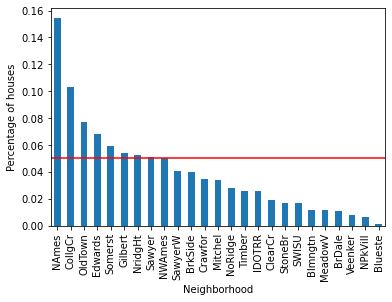

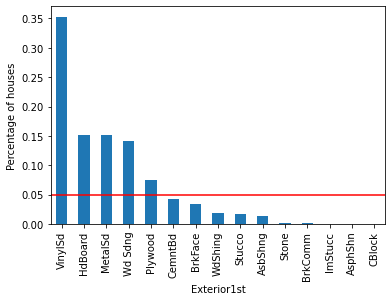

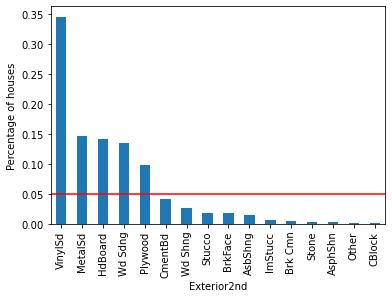

In [4]:
total_houses = len(data)

# for each categorical variable
for col in cat_cols:

    # count the number of houses per categoryand divide by total houses
    # aka percentage of houses per category

    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or Rare Values and could cause over-fitting.

#### How is the target, SalePrice, related to these categories?
In the following cells, we will understand the mean SalePrice per group of houses in each categories. The function written below calculates-

 - The percentage of houses per category
 - The mean SalePrice per category

In [5]:
def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

Now we will use the function to calculate the percentage of houses in each category of the variable Neighborhood and the mean salePrice for each category.

In [6]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


As we can see ~15% of houses are in NAmes and the mean SalePrice is 145847.

We will create a function to plot the category frequency and the mean SalePrice. The function will draw a bar plot of the percentages of houses in each category and a line plot for the mean sale price for each category. This will help us visualise the relationship between the target and the labels of the categorical variable.

In [7]:
def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

We will call the function for the variable Neighborhood.

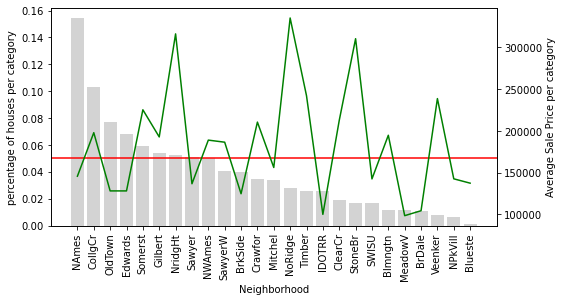

In [8]:
plot_categories(temp_df, 'Neighborhood')

Houses in the Neighborhood of NridgHt sell at a high price, whereas houses in Sawyer tend to be cheaper.

Houses in the Neighborhood of StoneBr have on average a high SalePrice, above 300k. However, less than 5% of the houses in the dataset are located in StoneBr.

Why is this important? Because if we do not have a lot of houses to learn from, we could be under or over-estimating the effect of StoneBr on the SalePrice.

In other words, how confident are we to generalise that most houses in StoneBr will sell for around 300k, when we only have a few houses to learn from?

Let’s draw plots for the remaining categorical variables.

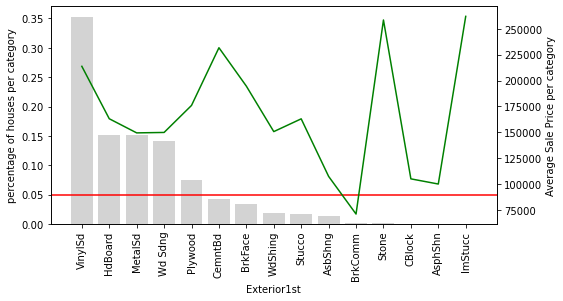

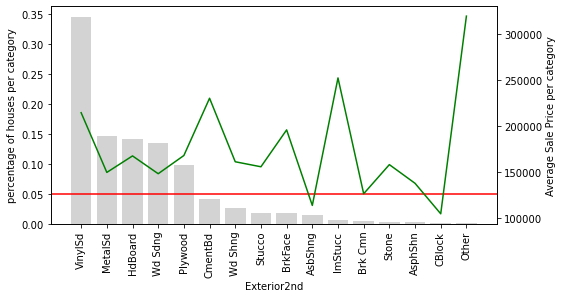

In [9]:
for col in cat_cols:
    
    # we plotted this variable already
    if col !='Neighborhood':
        
        # using the functions we created
        temp_df = calculate_mean_target_per_category(data, col)
        plot_categories(temp_df, col)

Let’s look at variable Exterior2nd: Most of the categories in Exterior2nd are present in less than 5% of houses. In addition, the SalePrice varies a lot across those rare categories. The mean value of SalePrice goes up and down over the infrequent categories. In fact, it looks quite noisy. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can’t be sure whether they have a true impact on the house price. We could be under or over-estimating their impact due to the fact that we have very less information.

Note: This plot would bring more value, if we plotted the errors of the mean SalePrice. It would give us an idea of how much the mean value of the target varies within each label. Why don’t you go ahead and add the standard deviation to the plot?



### Rare labels: grouping under a new label

One common way of working with rare or infrequent values, is to group them under an umbrella category called ‘Rare’ or ‘Other’. In this way, we are able to understand the “collective” effect of the infrequent labels on the target.

We will replace all the labels that come in the less than 5% range with the label rare.

In [10]:
def group_rare_labels(df, var):

    total_houses = len(df)

    # first we will calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # then we will create a dictionary to replace the rare labels with the string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # now we will replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

We will start by grouping the rare labels in Neighborhood.

In [11]:
data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


Now we will plot Neighborhood_grouped variable.

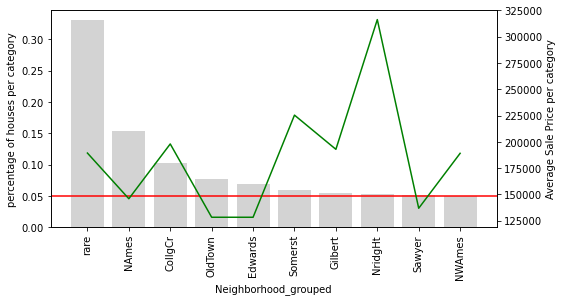

In [12]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

rare now contains the overall influence of all the infrequent categories on the SalePrice.

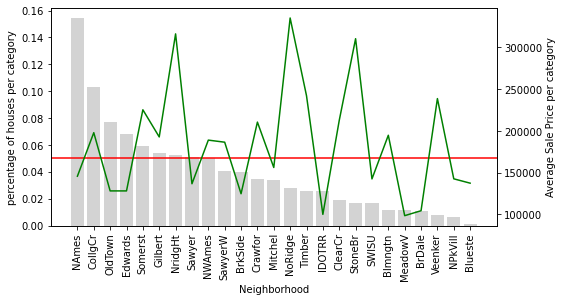

In [13]:
# let's plot the original Neighborhood for comparison
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into rare which captures the average SalePrice for all the infrequent labels.

Now we will group and plot the remaining categorical variables.

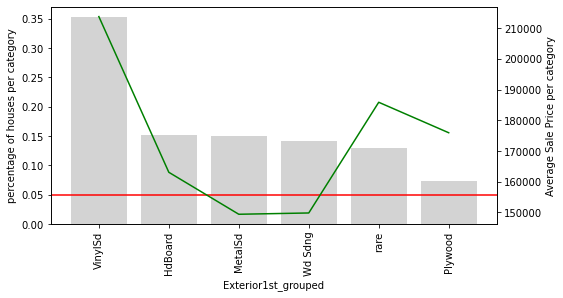

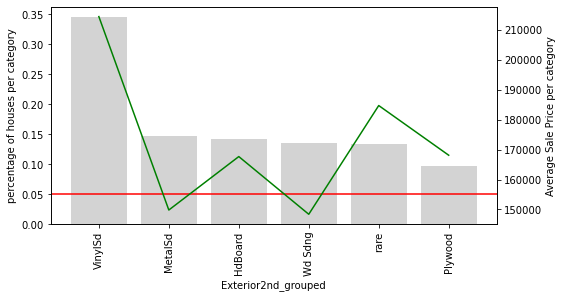

In [14]:
for col in cat_cols[1:]:
        
    # re using the functions I created
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Here is something interesting: In the variable Exterior1st, look at how all the houses with rare values are on an average more expensive than the rest, except for those with VinySd.

The same is true for Exterior2nd. The rare categories seem to have had something in common.

Note: Ideally, we would also like to have the standard deviation / inter-quantile range for the SalePrice, to get an idea of how variable the house price is for each category.

### Rare labels lead to uneven distribution of categories in train and test sets
Similarly to highly cardinal variables, rare or infrequent labels often land only in the training set, or only in the testing set. If present only in the training set, they may lead to over-fitting. If present only in the testing set, the machine learning algorithm will not know how to handle them, as it has not seen the rare labels during training. Let’s explore this further.

Now we will split the data into training and testing set with the help of train_test_split(). cat_col contains the variables of the feature space i.e. the variables which provide information necessary for prediction. SalePrice contains the values which have to be predicted The test_size = 0.3 will keep 30% data for testing and 70% data will be used for training the model. random_state controls the shuffling applied to the data before applying the split.

The training dataset contains 1022 rows and the test dataset contains 483 rows.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

Now let’s find the labels of variable Exterior1st that are present only in the training set.

In [16]:
unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]

print(unique_to_train_set)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']


There are 4 categories present in the training set and are not present in the test set. Now let’s find the labels present only in the test set.



In [17]:
unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]

print(unique_to_test_set)

['AsphShn']


In this case, there is 1 rare value present in the test set only.

As we discussed earlier, we can see that there is an uneven distribution of labels in the training and test datasets.